# **Python Libraries I Will Use**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn import tree
from xgboost import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

### **Adding the Kaggle Dataset I Use**

In [2]:
data = pd.read_csv("C:/Users/berka/Desktop/Tez Code/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### **General Information of the Data Set**

In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### **Data Types of the Data Set**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### **Information About Missing Data in the Data Set**
**As you can see, there is no missing data in the data set I used. Thus, we do not need to take action for missing data.**

In [5]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# **Data Preparation**
**Here, we first converted the object variables in the data set to categorical variables. The reason why we do this is to avoid mistakes in the sensitive work we will do in the future.**

In [6]:
data.Sex            = pd.Categorical(data.Sex)
data.ChestPainType  = pd.Categorical(data.ChestPainType)
data.RestingECG     = pd.Categorical(data.RestingECG)
data.ExerciseAngina = pd.Categorical(data.ExerciseAngina)
data.ST_Slope       = pd.Categorical(data.ST_Slope)

In [7]:
data.dtypes

Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object

**After doing this, we divide the data for the models into test and train parts. Of course, here we make the test part from a smaller piece. The reason is that we use most of the data for train.**

In [8]:
x = data.iloc[:,0:11]
y = data.HeartDisease

In [9]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [10]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [11]:
en = LabelEncoder()
cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in cols:
    data[col] = en.fit_transform(data[col])

In [12]:
x = data.drop('HeartDisease', axis = 1)
y = data['HeartDisease']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

**After these operations, let's check the data.**

In [14]:
x_train.shape

(734, 11)

In [15]:
x_test.shape

(184, 11)

In [16]:
y_train.shape

(734,)

In [17]:
y_test.shape

(184,)

In [18]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# **Algorithms I Will Use**
* Logistic Regression
* Random Forest
* Decision Tree
* Gradient Boosted Trees
* Support Vector Machine

## **Logistic Regression**

In [19]:
model = LogisticRegression(random_state = 0, max_iter = 1000).fit(x_train, y_train)

In [20]:
%%time
y_pred = model.predict(x_test)

Wall time: 1.99 ms


In [21]:
accuracy_score(y_test, y_pred)

0.8858695652173914

<AxesSubplot:>

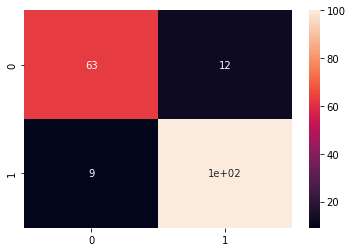

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [23]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        75
           1       0.89      0.92      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



## **Random Forest**

In [24]:
model= RandomForestClassifier (n_estimators=10, max_features="auto", random_state=101)

In [25]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [26]:
%%time
y_pred=model.predict(x_test)

Wall time: 3.95 ms


In [27]:
accuracy_score(y_test, y_pred)

0.8641304347826086

<AxesSubplot:>

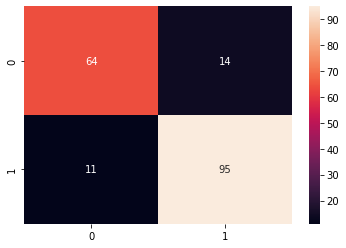

In [28]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [29]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        78
           1       0.87      0.90      0.88       106

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## **Decision Tree**

In [30]:
model = DecisionTreeClassifier()

In [31]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
%%time
y_pred = model.predict(x_test)

Wall time: 1.99 ms


In [33]:
accuracy_score(y_test, y_pred)

0.7934782608695652

<AxesSubplot:>

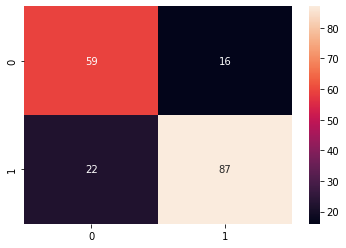

In [34]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        75
           1       0.84      0.80      0.82       109

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



## **Gradient Boosted Trees**

In [36]:
model = GradientBoostingClassifier()

In [37]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [38]:
%%time
y_pred = model.predict(x_test)

Wall time: 2.99 ms


In [39]:
accuracy_score(y_test, y_pred)

0.8532608695652174

<AxesSubplot:>

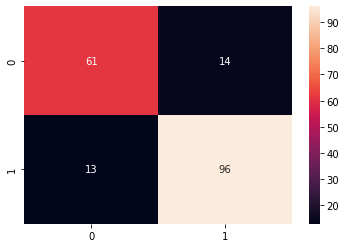

In [40]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [41]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82        74
           1       0.88      0.87      0.88       110

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## **Support Vector Machine**

In [42]:
model = LinearSVC()

In [43]:
model.fit(x_train,y_train)

C:\Users\berka\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [44]:
%%time
y_pred = model.predict(x_test)

Wall time: 997 µs


In [45]:
accuracy_score(y_test, y_pred)

0.8315217391304348

<AxesSubplot:>

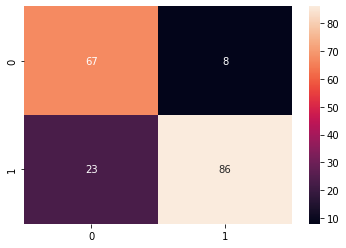

In [46]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [47]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        90
           1       0.79      0.91      0.85        94

    accuracy                           0.83       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184

